In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Define the ticker for Nifty50 (NSE index)
ticker = 'TCS.NS'
start_date = "2020-03-21"
end_date = "2025-04-08"

# Download historical data from Yahoo Finance
tcs_data = yf.download(ticker, start=start_date, end=end_date)

# Extract the 'Close' column which represents the closing prices
tcs_close = tcs_data[['Close']].copy()

tcs_close.head()


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,TCS.NS
Date,
2020-03-23,1536.202393
2020-03-24,1566.977783
2020-03-25,1610.358154
2020-03-26,1647.758301
2020-03-27,1678.625977


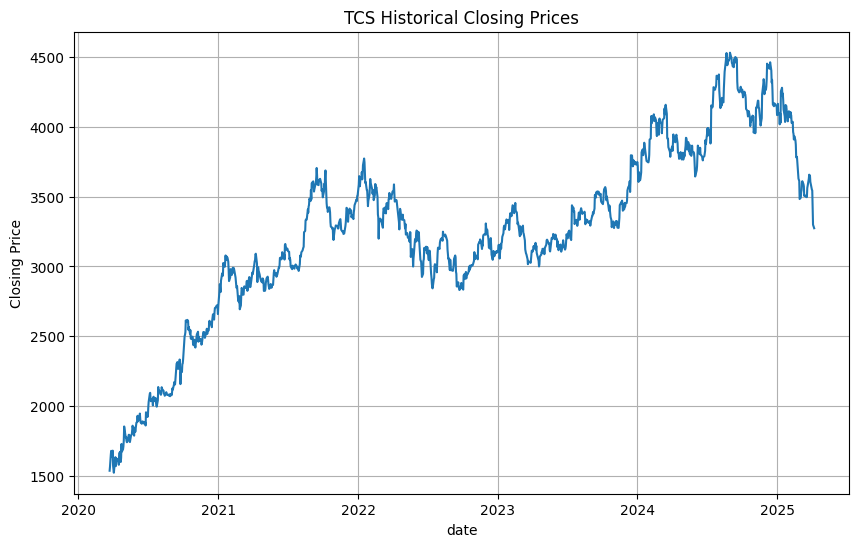

In [ ]:
# Plot the historical volatility data
plt.figure(figsize=(10, 6))
plt.plot(tcs_close.index, tcs_close)
plt.xlabel("date")
plt.ylabel("Closing Price")
plt.title("TCS Historical Closing Prices")
plt.grid(True)

plt.show()

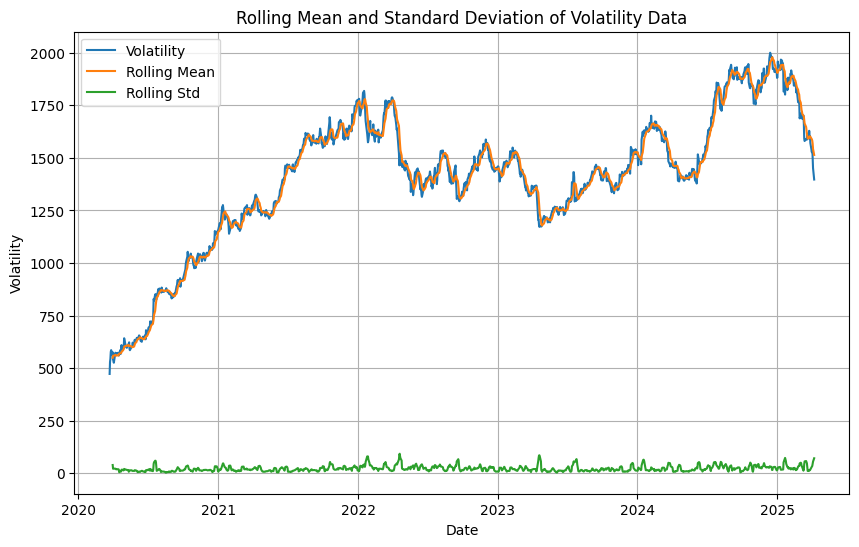

In [ ]:
# Calculate the rolling mean and standard deviation
rolling_mean = tcs_close.rolling(window=7).mean()
rolling_std = tcs_close.rolling(window=7).std()

# Plot the rolling mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(tcs_close.index, tcs_close, label="Volatility")
plt.plot(rolling_mean.index, rolling_mean, label="Rolling Mean")
plt.plot(rolling_std.index, rolling_std, label="Rolling Std")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Rolling Mean and Standard Deviation of Volatility Data")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
!pip install arch

In [ ]:
from arch import arch_model

In [ ]:
# Calculate log returns
returns = np.log(tcs_close).diff().dropna()

In [ ]:
# Fit an ARCH(1) model to the returns data
model_arch = arch_model(returns, vol='ARCH', p=1)  # p=1 for ARCH(1)
model_fit_arch = model_arch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 150175873.96645236
Iteration:      2,   Func. Count:     16,   Neg. LLF: -2584.8832909443877
Iteration:      3,   Func. Count:     24,   Neg. LLF: -3335.13812597712
Iteration:      4,   Func. Count:     30,   Neg. LLF: -3294.3295863418944
Iteration:      5,   Func. Count:     37,   Neg. LLF: -3523.2964898067066
Iteration:      6,   Func. Count:     41,   Neg. LLF: -3523.296504602434
Iteration:      7,   Func. Count:     44,   Neg. LLF: -3523.296504602454
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3523.296504602434
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002124. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# Output the model summary
print(model_fit_arch.summary())

                       Constant Mean - ARCH Model Results                      
Dep. Variable:     ('Close', 'TCS.NS')   R-squared:                       0.000
Mean Model:              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        ARCH   Log-Likelihood:                3523.30
Distribution:                   Normal   AIC:                          -7040.59
Method:             Maximum Likelihood   BIC:                          -7025.21
                                         No. Observations:                 1248
Date:                 Fri, Apr 11 2025   Df Residuals:                     1247
Time:                         11:03:48   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.2392e-04  4.078e-04      1.040   

In [ ]:
volatility_arch = model_fit_arch.conditional_volatility

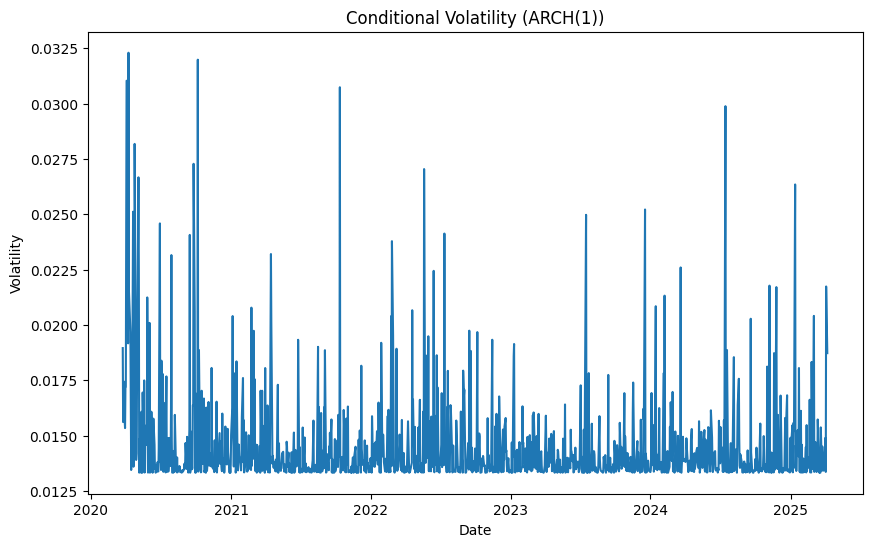

In [ ]:
# Plot the conditional volatility (estimated volatility)
plt.figure(figsize=(10, 6))
plt.plot(volatility_arch)
plt.title('Conditional Volatility (ARCH(1))')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

In [ ]:
print(volatility_arch.index)
print(returns.index)

DatetimeIndex(['2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-03',
               '2020-04-07', '2020-04-08',
               ...
               '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27',
               '2025-03-28', '2025-04-01', '2025-04-02', '2025-04-03',
               '2025-04-04', '2025-04-07'],
              dtype='datetime64[ns]', name='Date', length=1248, freq=None)
DatetimeIndex(['2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-03',
               '2020-04-07', '2020-04-08',
               ...
               '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27',
               '2025-03-28', '2025-04-01', '2025-04-02', '2025-04-03',
               '2025-04-04', '2025-04-07'],
              dtype='datetime64[ns]', name='Date', length=1248, freq=None)


In [ ]:
mae = np.mean(np.abs(volatility_arch.values - returns.values))
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.01669383427447183


In [ ]:
rmse = np.sqrt(np.mean((volatility_arch.values - returns.values) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.020254963648503033


In [ ]:
# Fit the GARCH(1, 1) model
model = arch_model(returns, vol="Garch", p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 78073067.16262206
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3550.114273349069
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3550.114307488482
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002124. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - GARCH Model Results                      
===============================================================================
Dep. Variable:     ('Close', 'TCS.NS')   R-squared:                       0.000
Mean Model:              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       GARCH   Log-Likelihood:                3550.11
Distribution:                   Normal   AIC:                          -7092.23
Method:             Maximum Likelihood   BIC:                          -7071.71
                                         No. Observations:                 1248
Date:                 Fri, Apr 11 2025   Df Residuals:                     1247
Time:                         11:04:07   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.8051e-04  4.040e-04      1.190      0.234 [-3.112e-04,1.272e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.2488e-06  3.051e-11  1.393e+05      0.000 [4.249e-06,4.249e-06]
alpha[1]       0.0100  1.808e-03      5.532  3.163e-08 [6.457e-03,1.354e-02]
beta[1]        0.9700  1.972e-03    491.910      0.000     [  0.966,  0.974]
============================================================================

Covariance estimator: robust
"""

In [ ]:
# Estimate the volatility
volatility = results.conditional_volatility

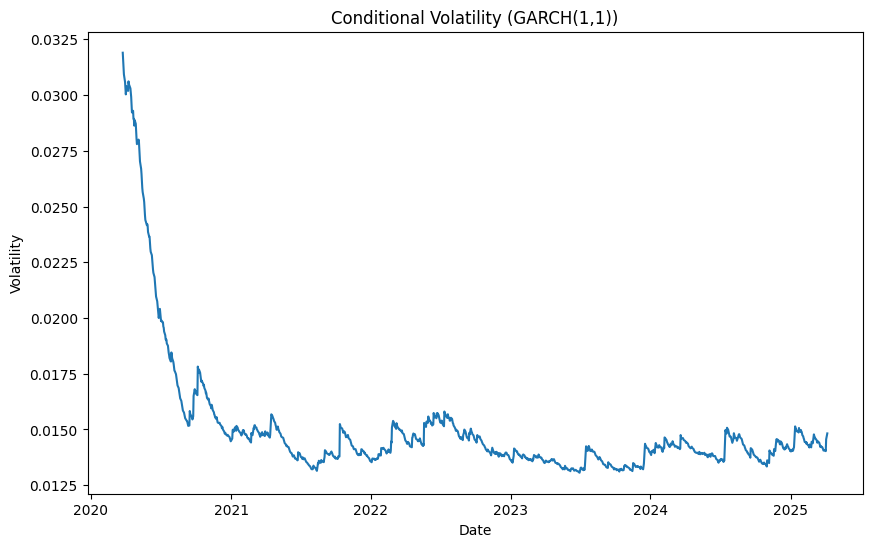

In [ ]:
# Plot the conditional volatility (estimated volatility)
plt.figure(figsize=(10, 6))
plt.plot(volatility)
plt.title('Conditional Volatility (GARCH(1,1))')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

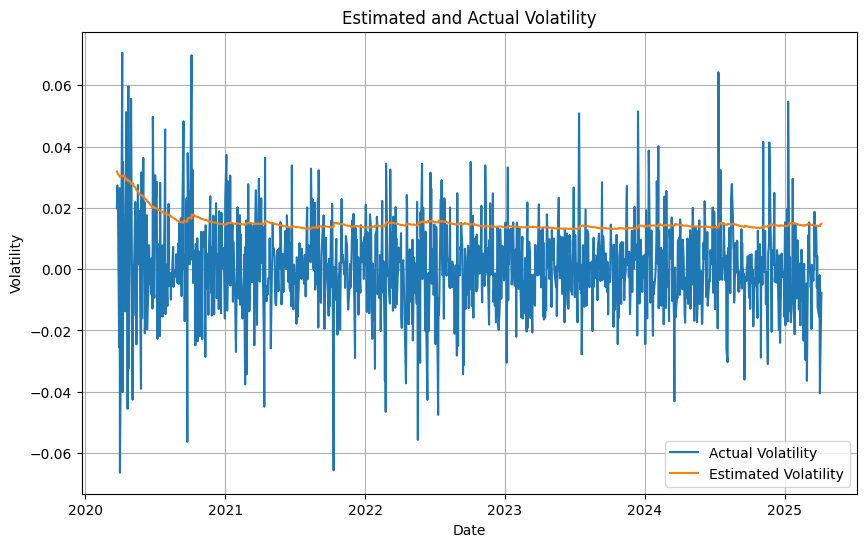

In [ ]:
# Plot the estimated and actual volatility
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns, label="Actual Volatility")
plt.plot(volatility.index, volatility, label="Estimated Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Estimated and Actual Volatility")
plt.legend()
plt.grid(True)

plt.show()

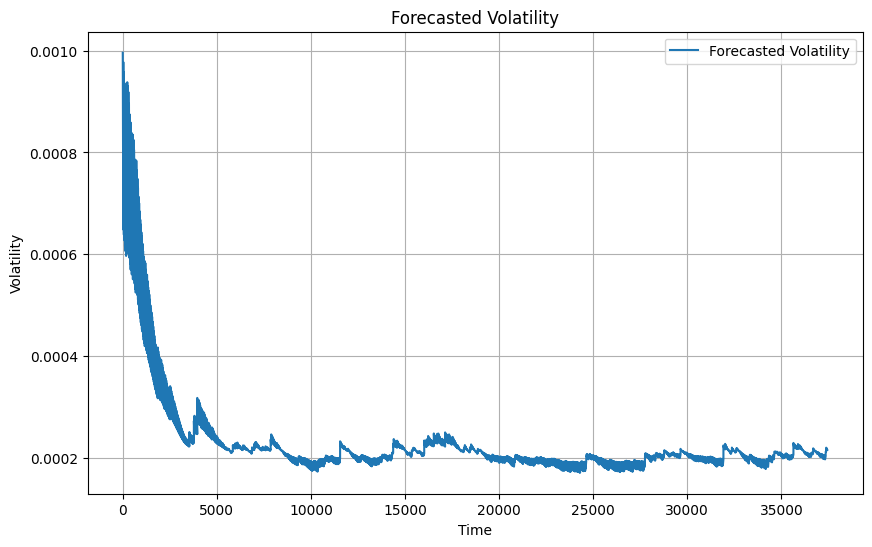

In [ ]:
# Forecast the volatility
forecast = results.forecast(start=0, horizon=30)
forecast_volatility = forecast.variance.dropna().values.flatten()

# Plot the forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(forecast_volatility, label="Forecasted Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Forecasted Volatility")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(volatility.values - returns.values))
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((volatility.values - returns.values) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.01710707909873392
Root Mean Squared Error (RMSE): 0.020697060920334517


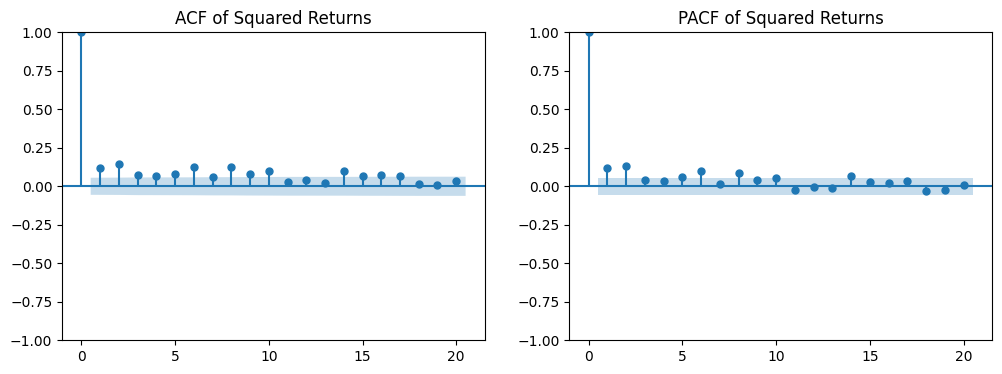

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF of squared returns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(returns**2, lags=20, ax=axes[0])
axes[0].set_title("ACF of Squared Returns")

plot_pacf(returns**2, lags=20, ax=axes[1])
axes[1].set_title("PACF of Squared Returns")

plt.show()

In [ ]:
# Fit the GARCH(2, 2) model
model1 = arch_model(returns, vol="Garch", p=2, q=2)
results1 = model1.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 1.4578147574864632e+18
Iteration:      2,   Func. Count:     22,   Neg. LLF: 1071973033961.6648
Iteration:      3,   Func. Count:     33,   Neg. LLF: 45756923.938919835
Iteration:      4,   Func. Count:     46,   Neg. LLF: -3550.451726932365
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3550.4517304885253
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 4


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002124. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - GARCH Model Results                      
===============================================================================
Dep. Variable:     ('Close', 'TCS.NS')   R-squared:                       0.000
Mean Model:              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       GARCH   Log-Likelihood:                3550.45
Distribution:                   Normal   AIC:                          -7088.90
Method:             Maximum Likelihood   BIC:                          -7058.13
                                         No. Observations:                 1248
Date:                 Fri, Apr 11 2025   Df Residuals:                     1247
Time:                         10:25:00   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.0904e-04  3.796e-04      1.341      0.180 [-2.349e-04,1.253e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.1240e-05  2.642e-11  8.038e+05      0.000  [2.124e-05,2.124e-05]
alpha[1]       0.0250  3.633e-02      0.688      0.491 [-4.621e-02,9.621e-02]
alpha[2]       0.0250  4.186e-02      0.597      0.550   [-5.705e-02,  0.107]
beta[1]        0.4249      0.558      0.762      0.446      [ -0.669,  1.519]
beta[2]        0.4249      0.571      0.745      0.457      [ -0.694,  1.544]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
volatility1 = results1.conditional_volatility

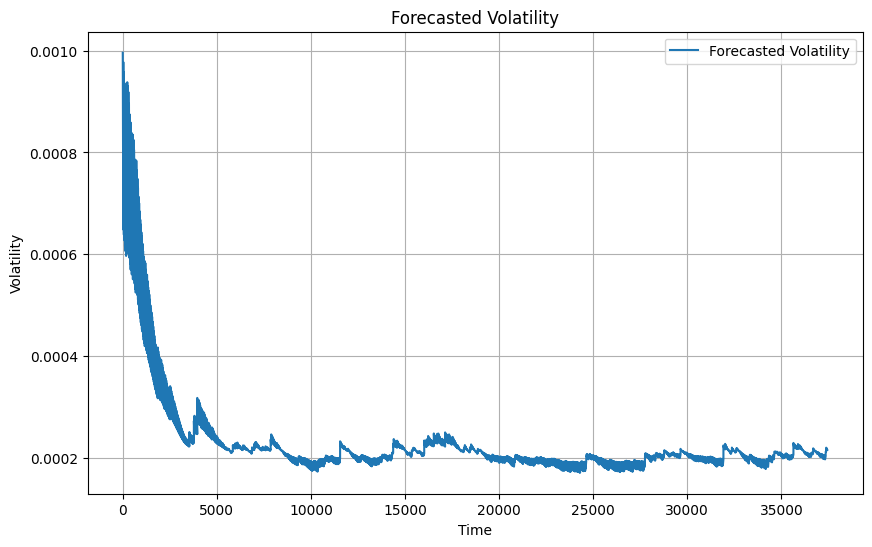

In [ ]:
# Forecast the volatility
forecast = results.forecast(start=0, horizon=30)
forecast_volatility = forecast.variance.dropna().values.flatten()

# Plot the forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(forecast_volatility, label="Forecasted Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Forecasted Volatility")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Calculate the mean absolute error (MAE)
mae1 = np.mean(np.abs(volatility1.values - returns.values))
print("Mean Absolute Error (MAE):", mae1)

# Calculate the root mean squared error (RMSE)
rmse1 = np.sqrt(np.mean((volatility1.values - returns.values) ** 2))
print("Root Mean Squared Error (RMSE):", rmse1)

Mean Absolute Error (MAE): 0.016763778911739333
Root Mean Squared Error (RMSE): 0.020321248725954207


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Define the ticker for Nifty50 (NSE index)
ticker = 'INFY.NS'
start_date = "2020-03-21"
end_date = "2025-04-08"

# Download historical data from Yahoo Finance
infy_data = yf.download(ticker, start=start_date, end=end_date)

# Extract the 'Close' column which represents the closing prices
infy_close = infy_data[['Close']].copy()

infy_close.head()


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,INFY.NS
Date,
2020-03-23,472.404785
2020-03-24,529.251221
2020-03-25,543.967712
2020-03-26,576.989868
2020-03-27,585.694031


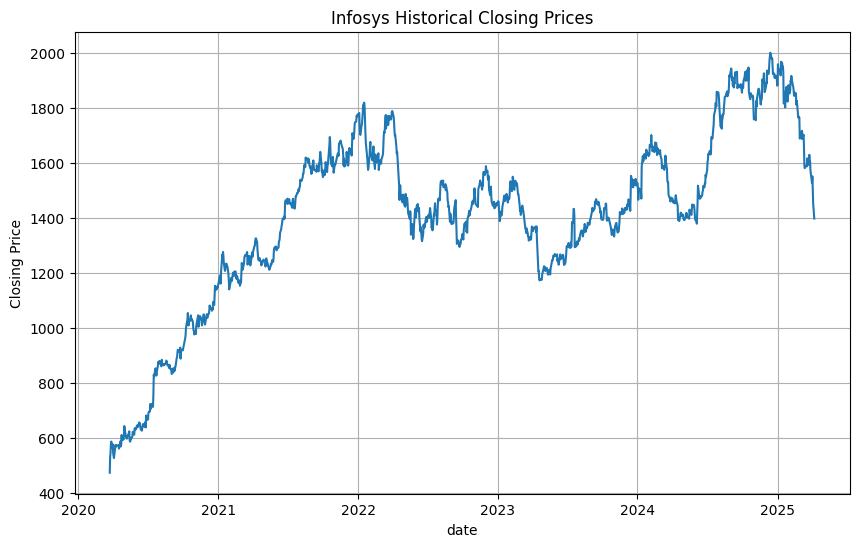

In [ ]:
# Plot the historical volatility data
plt.figure(figsize=(10, 6))
plt.plot(infy_close.index, infy_close)
plt.xlabel("date")
plt.ylabel("Closing Price")
plt.title("Infosys Historical Closing Prices")
plt.grid(True)

plt.show()

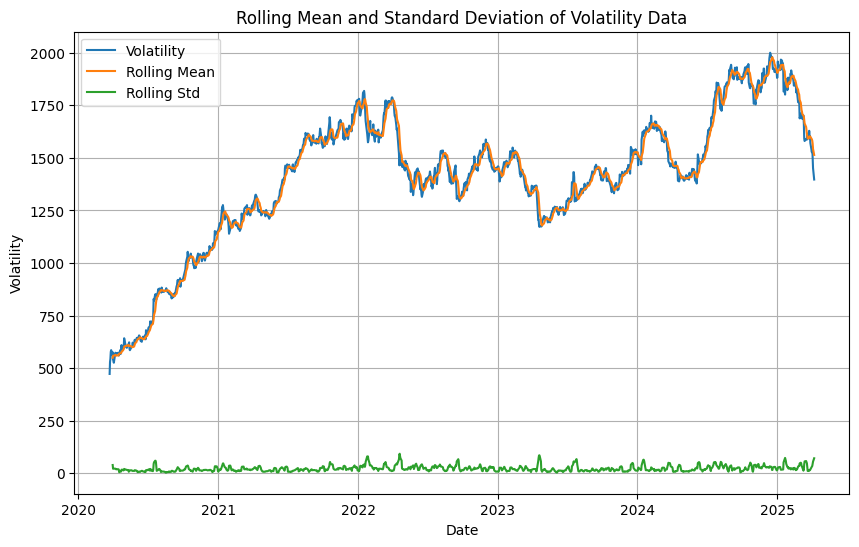

In [ ]:
# Calculate the rolling mean and standard deviation
rolling_mean = infy_close.rolling(window=7).mean()
rolling_std = infy_close.rolling(window=7).std()

# Plot the rolling mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(infy_close.index, infy_close, label="Volatility")
plt.plot(rolling_mean.index, rolling_mean, label="Rolling Mean")
plt.plot(rolling_std.index, rolling_std, label="Rolling Std")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Rolling Mean and Standard Deviation of Volatility Data")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Calculate log returns
returns = np.log(infy_close).diff().dropna()

In [ ]:
# Fit an ARCH(1) model to the returns data
model_arch = arch_model(returns, vol='ARCH', p=1)  # p=1 for ARCH(1)
model_fit_arch = model_arch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 746449810.2830272
Iteration:      2,   Func. Count:     16,   Neg. LLF: -94.69599345794597
Iteration:      3,   Func. Count:     25,   Neg. LLF: -2217.6499519107733
Iteration:      4,   Func. Count:     32,   Neg. LLF: -288.55614667648456
Iteration:      5,   Func. Count:     40,   Neg. LLF: -3317.6813827789742
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1404184.6942698306
Iteration:      7,   Func. Count:     53,   Neg. LLF: -3377.498230891921
Iteration:      8,   Func. Count:     57,   Neg. LLF: -3377.498232278239
Iteration:      9,   Func. Count:     60,   Neg. LLF: -3377.498232278237
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3377.498232278239
            Iterations: 9
            Function evaluations: 60
            Gradient evaluations: 9


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002828. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# Output the model summary
print(model_fit_arch.summary())

                       Constant Mean - ARCH Model Results                       
Dep. Variable:     ('Close', 'INFY.NS')   R-squared:                       0.000
Mean Model:               Constant Mean   Adj. R-squared:                  0.000
Vol Model:                         ARCH   Log-Likelihood:                3377.50
Distribution:                    Normal   AIC:                          -6749.00
Method:              Maximum Likelihood   BIC:                          -6733.61
                                          No. Observations:                 1248
Date:                  Fri, Apr 11 2025   Df Residuals:                     1247
Time:                          13:10:58   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.1820e-03  4.644e-04      2.

In [ ]:
volatility_arch = model_fit_arch.conditional_volatility

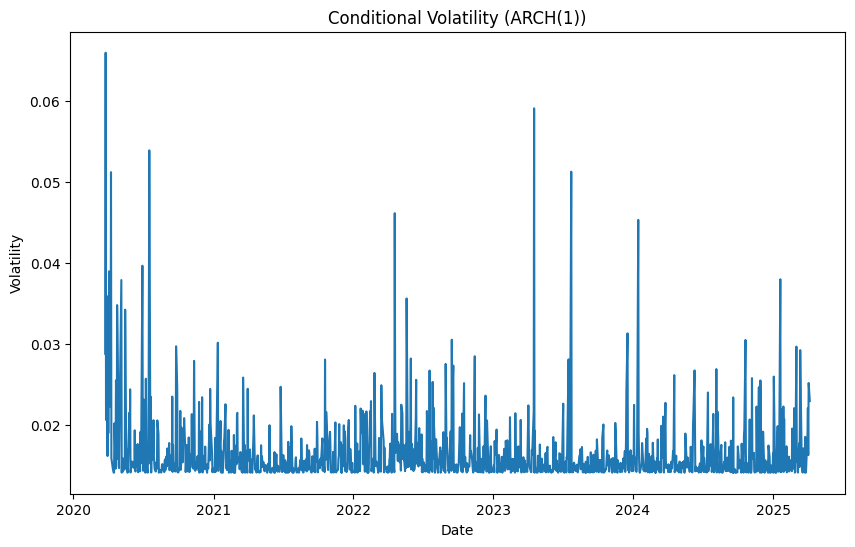

In [ ]:
# Plot the conditional volatility (estimated volatility)
plt.figure(figsize=(10, 6))
plt.plot(volatility_arch)
plt.title('Conditional Volatility (ARCH(1))')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

In [ ]:
print(volatility_arch.index)
print(returns.index)

DatetimeIndex(['2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-03',
               '2020-04-07', '2020-04-08',
               ...
               '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27',
               '2025-03-28', '2025-04-01', '2025-04-02', '2025-04-03',
               '2025-04-04', '2025-04-07'],
              dtype='datetime64[ns]', name='Date', length=1248, freq=None)
DatetimeIndex(['2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-03',
               '2020-04-07', '2020-04-08',
               ...
               '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27',
               '2025-03-28', '2025-04-01', '2025-04-02', '2025-04-03',
               '2025-04-04', '2025-04-07'],
              dtype='datetime64[ns]', name='Date', length=1248, freq=None)


In [ ]:
mae = np.mean(np.abs(volatility_arch.values - returns.values))
print("Mean Absolute Error (MAE):", mae)

rmse = np.sqrt(np.mean((volatility_arch.values - returns.values) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.018807347059407658
Root Mean Squared Error (RMSE): 0.023395106073547917


In [ ]:
# Fit the GARCH(1, 1) model
model = arch_model(returns, vol="Garch", p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8.693343289528942e+17
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3390.9533456164027
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3390.9533467852607
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002828. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - GARCH Model Results                       
================================================================================
Dep. Variable:     ('Close', 'INFY.NS')   R-squared:                       0.000
Mean Model:               Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GARCH   Log-Likelihood:                3390.95
Distribution:                    Normal   AIC:                          -6773.91
Method:              Maximum Likelihood   BIC:                          -6753.39
                                          No. Observations:                 1248
Date:                  Fri, Apr 11 2025   Df Residuals:                     1247
Time:                          13:12:37   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.7035e-04  4.648e-04      2.088  3.684e-02 [5.932e-05,1.881e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.8285e-05  1.219e-06     23.205 4.089e-119 [2.590e-05,3.067e-05]
alpha[1]       0.1000  5.595e-02      1.787  7.390e-02  [-9.665e-03,  0.210]
beta[1]        0.8000  3.847e-02     20.796  4.696e-96     [  0.725,  0.875]
============================================================================

Covariance estimator: robust
"""

In [ ]:
# Estimate the volatility
volatility = results.conditional_volatility

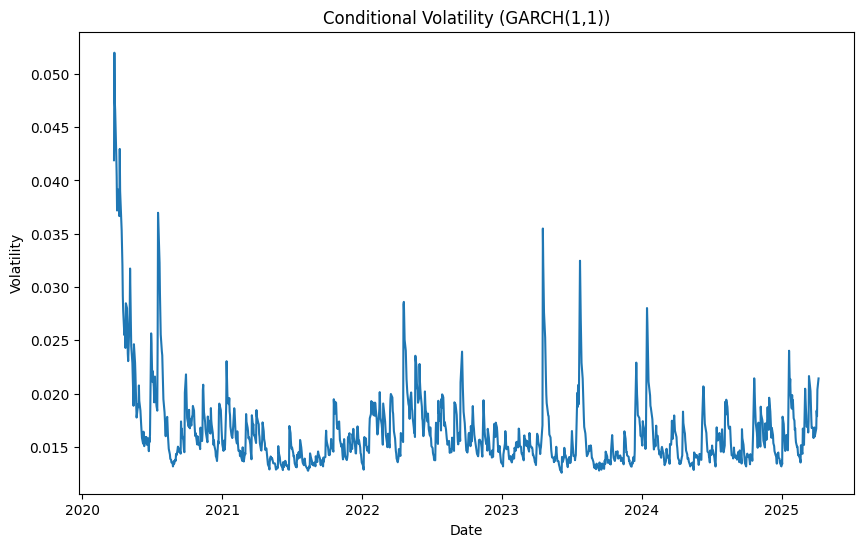

In [ ]:
# Plot the conditional volatility (estimated volatility)
plt.figure(figsize=(10, 6))
plt.plot(volatility)
plt.title('Conditional Volatility (GARCH(1,1))')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

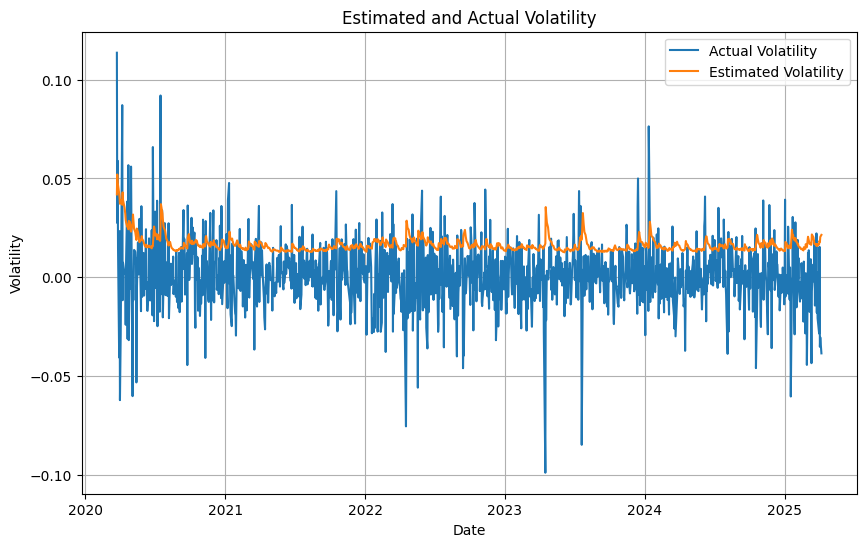

In [ ]:
# Plot the estimated and actual volatility
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns, label="Actual Volatility")
plt.plot(volatility.index, volatility, label="Estimated Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Estimated and Actual Volatility")
plt.legend()
plt.grid(True)

plt.show()

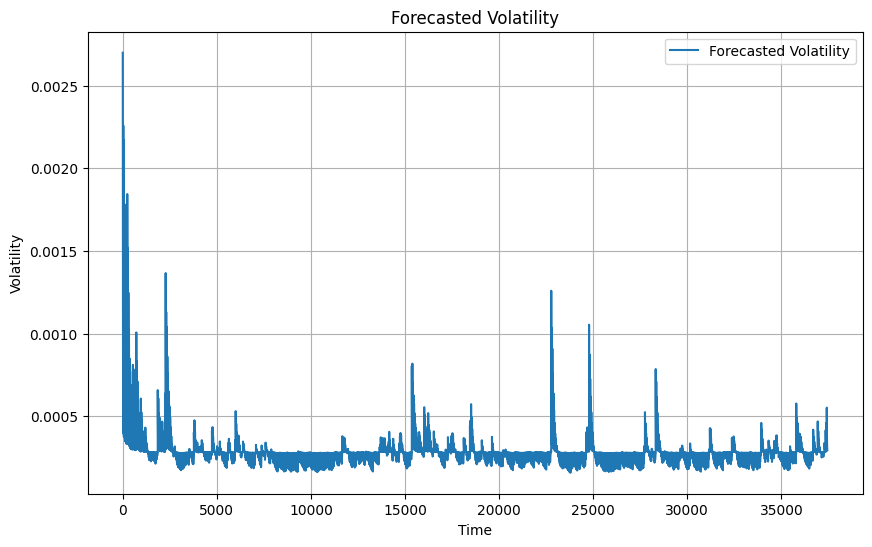

In [ ]:
# Forecast the volatility
forecast = results.forecast(start=0, horizon=30)
forecast_volatility = forecast.variance.dropna().values.flatten()

# Plot the forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(forecast_volatility, label="Forecasted Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Forecasted Volatility")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(volatility.values - returns.values))
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((volatility.values - returns.values) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.018764212008947168
Root Mean Squared Error (RMSE): 0.023294910310185015


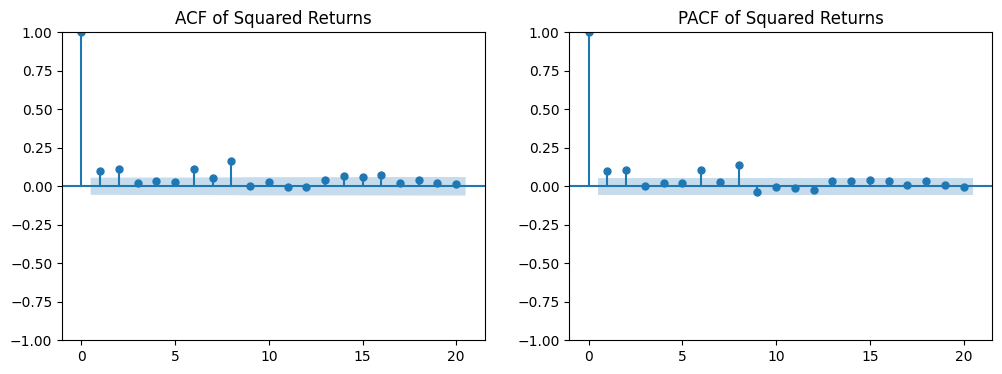

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF of squared returns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(returns**2, lags=20, ax=axes[0])
axes[0].set_title("ACF of Squared Returns")

plot_pacf(returns**2, lags=20, ax=axes[1])
axes[1].set_title("PACF of Squared Returns")

plt.show()

In [ ]:
# Fit the GARCH(2, 2) model
model1 = arch_model(returns, vol="Garch", p=2, q=2)
results1 = model1.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2674188.4154787282
Iteration:      2,   Func. Count:     21,   Neg. LLF: -3386.3049574238644
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3386.3049591349445
            Iterations: 6
            Function evaluations: 21
            Gradient evaluations: 2


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002828. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - GARCH Model Results                       
================================================================================
Dep. Variable:     ('Close', 'INFY.NS')   R-squared:                       0.000
Mean Model:               Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GARCH   Log-Likelihood:                3386.30
Distribution:                    Normal   AIC:                          -6760.61
Method:              Maximum Likelihood   BIC:                          -6729.83
                                          No. Observations:                 1248
Date:                  Fri, Apr 11 2025   Df Residuals:                     1247
Time:                          13:14:49   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.4629e-04  4.605e-04      1.838  6.610e-02 [-5.627e-05,1.749e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.8285e-05  2.866e-06      9.868  5.745e-23 [2.267e-05,3.390e-05]
alpha[1]       0.0500  5.904e-02      0.847      0.397  [-6.572e-02,  0.166]
alpha[2]       0.0500  7.498e-02      0.667      0.505  [-9.696e-02,  0.197]
beta[1]        0.4000      0.694      0.576      0.565     [ -0.961,  1.761]
beta[2]        0.4000      0.650      0.615      0.539     [ -0.875,  1.675]
============================================================================

Covariance estimator: robust
"""

In [ ]:
volatility1 = results1.conditional_volatility

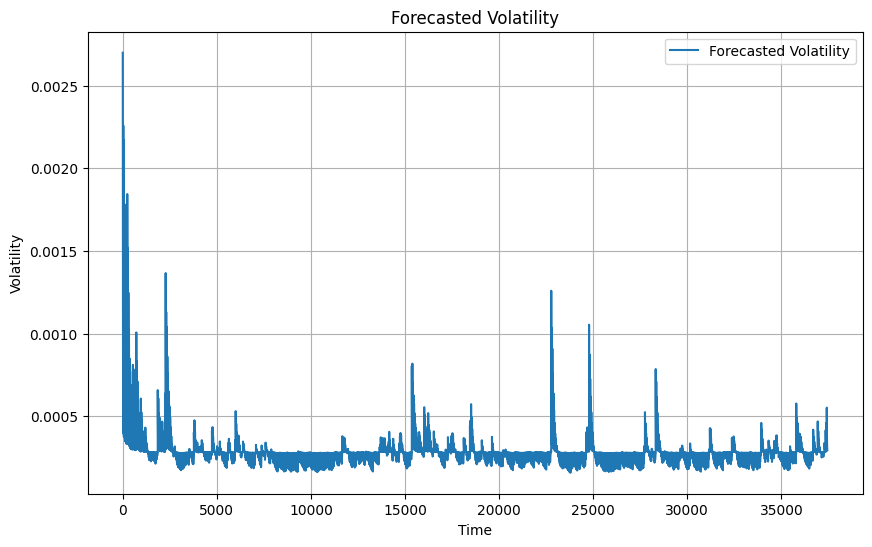

In [ ]:
# Forecast the volatility
forecast = results.forecast(start=0, horizon=30)
forecast_volatility = forecast.variance.dropna().values.flatten()

# Plot the forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(forecast_volatility, label="Forecasted Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Forecasted Volatility")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Calculate the mean absolute error (MAE)
mae1 = np.mean(np.abs(volatility1.values - returns.values))
print("Mean Absolute Error (MAE):", mae1)

# Calculate the root mean squared error (RMSE)
rmse1 = np.sqrt(np.mean((volatility1.values - returns.values) ** 2))
print("Root Mean Squared Error (RMSE):", rmse1)

Mean Absolute Error (MAE): 0.01884039194995667
Root Mean Squared Error (RMSE): 0.023351411171348264
